In [288]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [289]:
def readfile(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

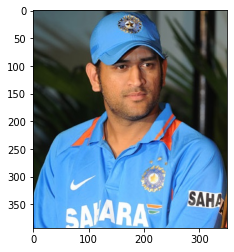

In [290]:
filename = "dhoni.png"
img = readfile(filename)

In [291]:
def edge_mask(img,line_size,blur_value):
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray_img, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

    return edges

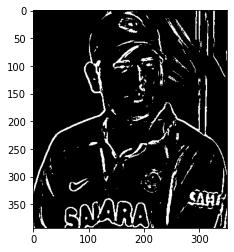

In [292]:
line_size = 7
blur_value = 7
edges = edge_mask(img,line_size,blur_value)

plt.imshow(edges, cmap="binary")
plt.show()

In [293]:
def color_quantize(img, k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20,0.001)

    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

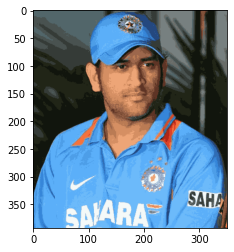

In [294]:
img_quantize = color_quantize(img, k=25)

plt.imshow(img_quantize)
plt.show()

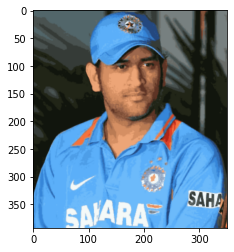

In [295]:
blurred = cv2.bilateralFilter(img_quantize, d=3, sigmaColor=150, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

In [296]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask= edges)

    return c


Text(0.5, 1.0, 'Second')

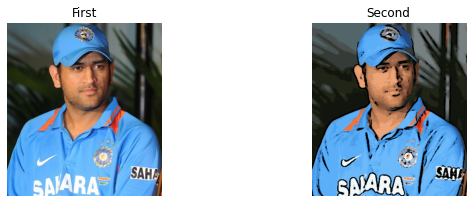

In [297]:
c = cartoon()

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 1)
  
plt.imshow(img)
plt.axis('off')
plt.title("First")

fig.add_subplot(2, 2, 2)
  
# showing image
plt.imshow(c)
plt.axis('off')
plt.title("Second")